# Тимофей Прокопенко, лабораторная 1

### № 8.1
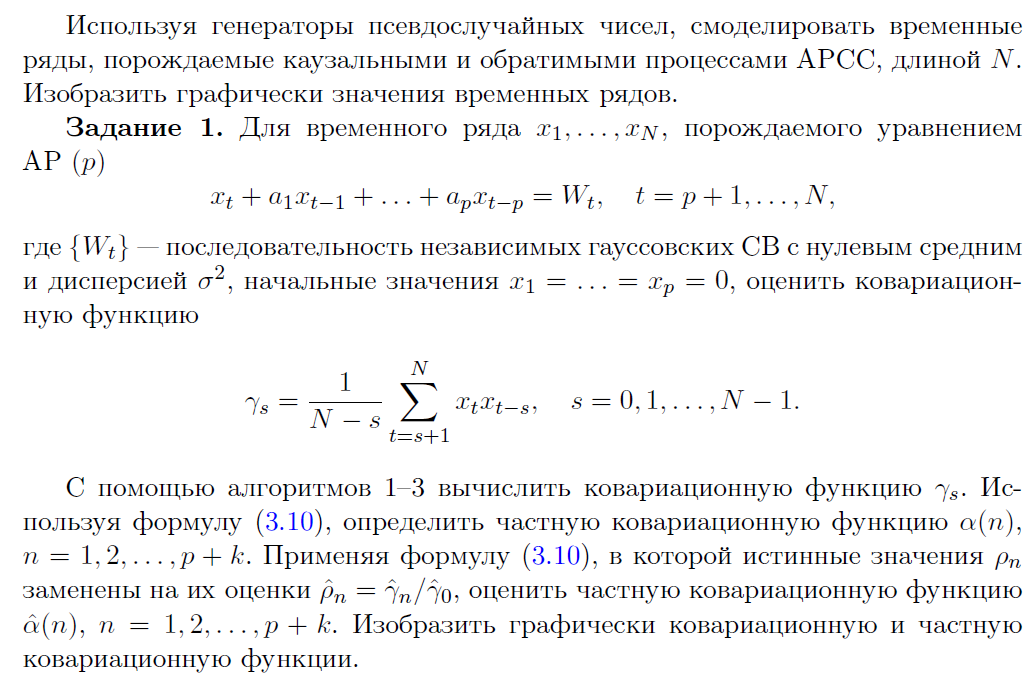

**Решение:**
1. Для начала выберем параметры процесса. Пусть p=1, N=100.
Стационарность авторегрессионного процесса зависит от корней характеристического полинома: $$a(z)=1-\sum_{i=1}^n a_i z^i$$
Для того чтобы процесс был стационарным, достаточно, чтобы все корни характеристического полинома лежали все единичного круга в комплексной плоскости |z|>1.
В частности, для АR(1) процесса а(z)=1-rz, следовательно корень этого полинома z=1/r, поэтому условие стационарности можно записать в виде |r|<1, то есть коэффицент авторегрессии (в данном случае равен коэффиценту автокорреляции) должен быть строго меньше 1 по модулю.
Таким образом, можно взять коэффицент а=0.99.
Приведем часть кода Python с нужными импортами и заданием переменных:

In [47]:
from random import random
from statistics import mean
import numpy
import matplotlib.pyplot as plt

N = 100
p = 1
a = 0.99

2. Моделирование процесса белого шума:

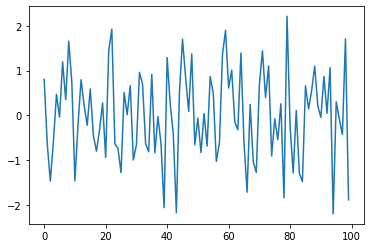

In [48]:
white_noise = numpy.random.normal(0, 1, size=N)  # N elements in the white_noise
# print(white_noise)
plt.plot(white_noise)
plt.show()

3. Моделирование данных

In [49]:
data = [0]
for i in range(1, N):  # N elements in the data
    data.append(white_noise[i] - a*data[i-1])
#print(data)

4. Вычисление ковариационной функции. Выберем второй алгоритм, учитывая, что:

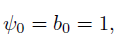

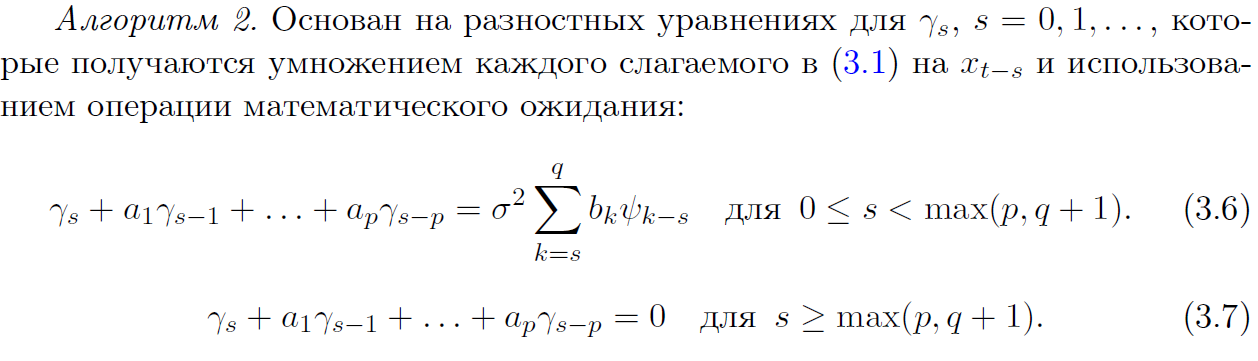

При p=1 формула 3.6 породит только один элемент равный $\sigma^2$.
Остальные элементы будут порождены формулой 3.7. Пусть 0 < s < N/3.

In [73]:
s_max = N
sigma_2 = mean([x*x for x in white_noise])
covariance = [sigma_2]
for i in range(1, s_max):  # N elements in the covariance vector
    covariance.append(-a*covariance[i-1])
#print(covariance)

5. Оценки ковариационной функции.
По формуле:
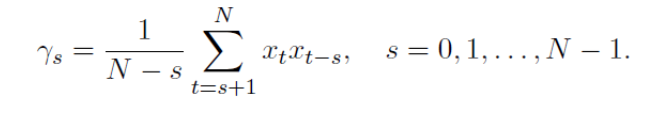
После изобразим график ковариационной функции (оранжевым цветом) и ее оценку (синим цветом).

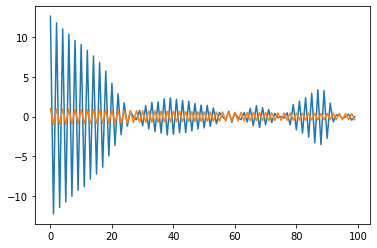

In [70]:
covariance_est = []
for s in range(0, s_max):
    local_sum = sum([data[t]*data[t-s] for t in range(s+1, N)])
    covariance_est.append((1/(N-s))*local_sum)
#print(covariance_est)
plt.plot(covariance_est)
plt.plot(covariance)

6. Частная ковариационная функция.
Она будет найдена по следующим формулам:
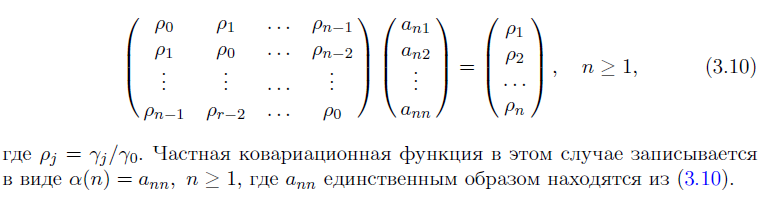

In [57]:
def get_partial_covariance(y_s, n):
    ro_vector = numpy.array([y_s[i]/y_s[0] for i in range(0, n+1)])  # n+1 elements
    matrix = numpy.array([[ro_vector[abs(j-i)] for i in range(0, n)] for j in range(0, n)])
    answer_vector = numpy.linalg.solve(matrix, ro_vector[1:])
    return answer_vector[n-1]

partial_covariance = [get_partial_covariance(covariance, n) for n in range(1, N-1)]
#print(partial_covariance)

7. Оценка частной ковариационной функции.
Изобразим также график частной ковариацинной функции (оранжевым цветом) и ее оценку (синим цветом).

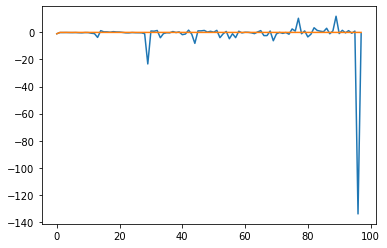

In [71]:
partial_covariance_est = [get_partial_covariance(covariance_est, n) for n in range(1, N-1)]
#print(partial_covariance_est)
plt.plot(partial_covariance_est)
plt.plot(partial_covariance)

8. Графики ковариационной и частной ковариационной функции.

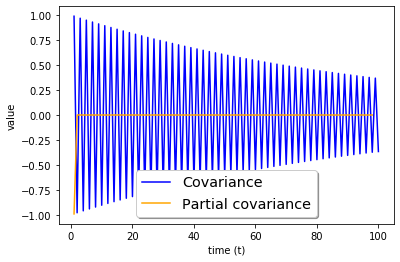

In [72]:
def generate_x_axe(y):
    return [x+1 for x in range(0, len(y))]

fig, ax = plt.subplots()
ax.plot(generate_x_axe(covariance), covariance, label='Covariance', color='blue')
ax.set_xlabel('time (t)')
ax.set_ylabel('value')

ax.plot(generate_x_axe(partial_covariance), partial_covariance, label='Partial covariance', color='orange')
legend = ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.show()

Приложение А. Листинг программы.

In [ ]:
from statistics import mean
import numpy
import matplotlib.pyplot as plt


def get_partial_covariance(y_s, n):
    ro_vector = numpy.array([y_s[i]/y_s[0] for i in range(0, n+1)])  # n+1 elements
    matrix = numpy.array([[ro_vector[abs(j-i)] for i in range(0, n)] for j in range(0, n)])
    answer_vector = numpy.linalg.solve(matrix, ro_vector[1:])
    return answer_vector[n-1]


def generate_x_axe(y):
    return [x+1 for x in range(0, len(y))]


if __name__ == '__main__':
    N = 100
    p = 1
    a = 0.99
    white_noise = numpy.random.normal(0, 1, size=100)  # N elements in the white_noise
    data = [0]
    for i in range(1, N):  # N elements in the data
        data.append(white_noise[i] - a*data[i-1])
    # print(data)
    s_max = N #int(N/3)
    sigma_2 = mean([x*x for x in white_noise])
    covariance = [sigma_2]
    for i in range(1, s_max):  # N/3 elements in the covariance vector
        covariance.append(-a*covariance[i-1])
    #print(covariance)

    covariance_est = []
    for s in range(0, s_max):
        covariance_est.append((1/(N-s))*(sum([data[t]*data[t-s] for t in range(s+1, N)])))
    #print(covariance_est)

    partial_covariance = [get_partial_covariance(covariance, n) for n in range(1, N-1)]
    # print(partial_covariance)
    partial_covariance_est = [get_partial_covariance(covariance_est, n) for n in range(1, N-1)]
    # print(partial_covariance_est)

    fig, ax = plt.subplots()
    ax.plot(generate_x_axe(covariance), covariance, label='Covariance', color='blue')
    ax.set_xlabel('time (t)')
    ax.set_ylabel('value')

    ax.plot(generate_x_axe(partial_covariance), partial_covariance, label='Partial covariance', color='orange')
    legend = ax.legend(loc='lower center', shadow=True, fontsize='x-large')

    plt.show()